In [2]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, YearLocator
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import seaborn as sns


In [217]:
df = pd.read_csv('Complete_Convoy_Data.csv')
df = df.drop(columns=['Unnamed: 0'])
df['Depart_Date'] = pd.to_datetime(df['Depart_Date'], errors='coerce')
#df.head(5)

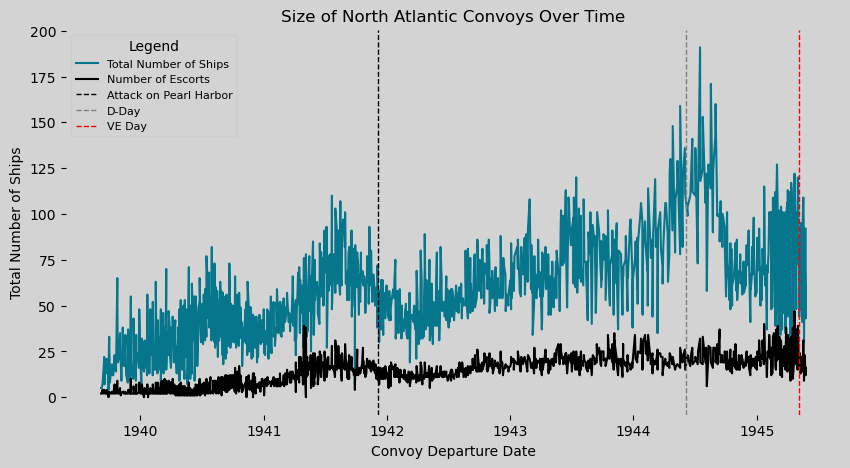

In [205]:
fig, ax = plt.subplots(figsize=(10, 5), facecolor='lightgrey')
ax.plot(df['Depart_Date'], df['Number of Ships'], label='Total Number of Ships', color='#06768d')
ax.plot(df['Depart_Date'], df['Number of Escort Ships'], color='00000', label='Number of Escorts')
#ax.plot(df['Depart_Date'], df['Avg Number of U-Boats in Atlantic'], color='brown', label='Avg Num of U-Boats in North Atlantic')
ax.set_xlabel('Convoy Departure Date')
ax.set_ylabel('Total Number of Ships')
ax.set_facecolor('lightgrey')
US_War = pd.to_datetime('1941-12-07')
D_Day = pd.to_datetime('1944-06-06')
VE_Day = pd.to_datetime('1945-05-05')
plt.axvline(x=US_War, color='black', linestyle='--', linewidth=1, label='Attack on Pearl Harbor')
plt.axvline(x=D_Day, color='grey', linestyle='--', linewidth=1, label='D-Day')
plt.axvline(x=VE_Day, color='red', linestyle='--', linewidth=1, label='VE Day')
plt.title('Size of North Atlantic Convoys Over Time')
plt.legend(title='Legend', facecolor='lightgrey', loc='upper left', markerscale=.5, fontsize=8)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.show()
#The total number of ships appears to decline during winter months. Should look into this later

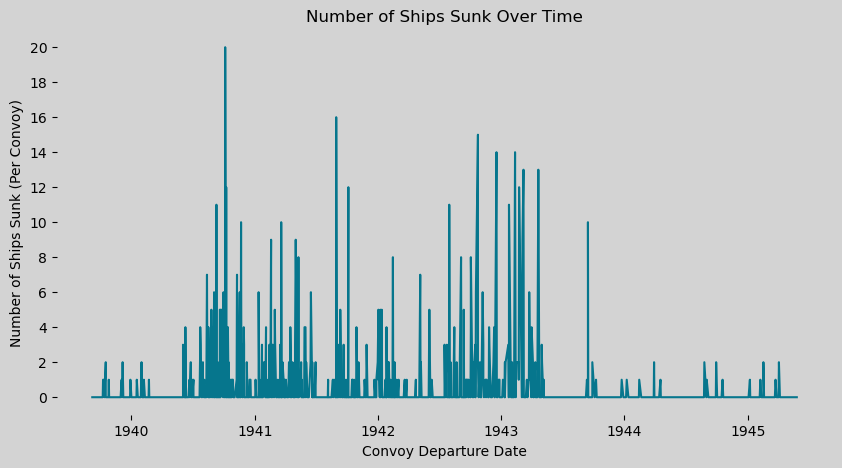

In [204]:
fig, ax = plt.subplots(figsize=(10, 5), facecolor='lightgrey')
ax.plot(df['Depart_Date'], df['Number of Ships Sunk'], label='Number of Ships Sunk', color='#06768d')
ax.set_xlabel('Convoy Departure Date')
ax.set_ylabel('Number of Ships Sunk (Per Convoy)')
ax.set_title('Number of Ships Sunk Over Time')
ax.set_facecolor('lightgrey')
plt.yticks(np.arange(0, 22, 2))
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.show()

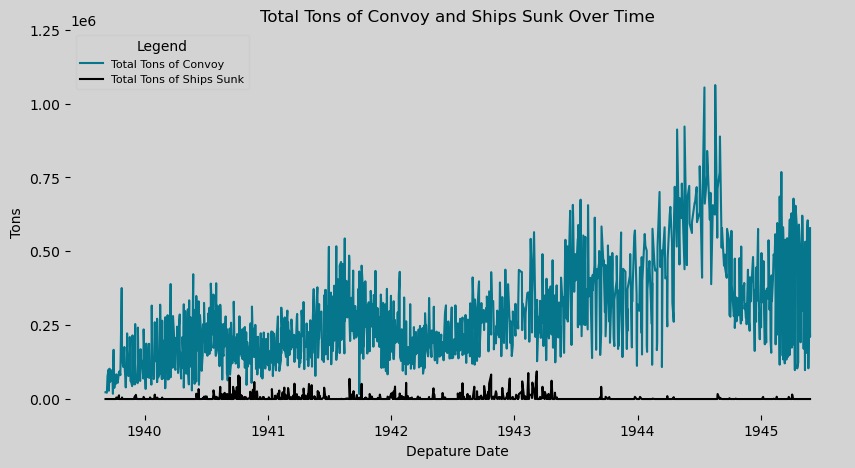

In [206]:
fig, ax = plt.subplots(figsize=(10, 5), facecolor='lightgrey')
ax.plot(df['Depart_Date'], df['Total Tons of Convoy'], label='Total Tons of Convoy', color='#06768d')
ax.plot(df['Depart_Date'], df['Total Tons of Ships Sunk'], label='Total Tons of Ships Sunk', color='00000')
ax.set_title('Total Tons of Convoy and Ships Sunk Over Time')
ax.set_ylabel('Tons')
ax.set_xlabel('Depature Date')
ax.set_facecolor('lightgrey')
plt.yticks(np.arange(0, 1500000, 250000))
plt.legend(title='Legend', facecolor='lightgrey', loc='upper left', markerscale=.5, fontsize=8)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.show()

In [208]:
#Subset Data by Years
years = df['Year'].unique()
ships_sunk_by_year = []
tons_sunk_by_year = []
for year in years:
    if pd.isna(year):
        continue
    year_df = df[df['Year'] == year]
    total_ships_sunk = year_df['Number of Ships Sunk'].sum()
    total_tons_sunk = year_df['Total Tons of Ships Sunk'].sum()
    ships_sunk_by_year.append((year, total_ships_sunk))
    tons_sunk_by_year.append((year, total_tons_sunk))
df_ships_sunk_by_year =  pd.DataFrame(ships_sunk_by_year, columns=('Year', 'Total Ships Sunk'))
df_tons_sunk_by_year =  pd.DataFrame(tons_sunk_by_year, columns=('Year', 'Total Tons Sunk'))

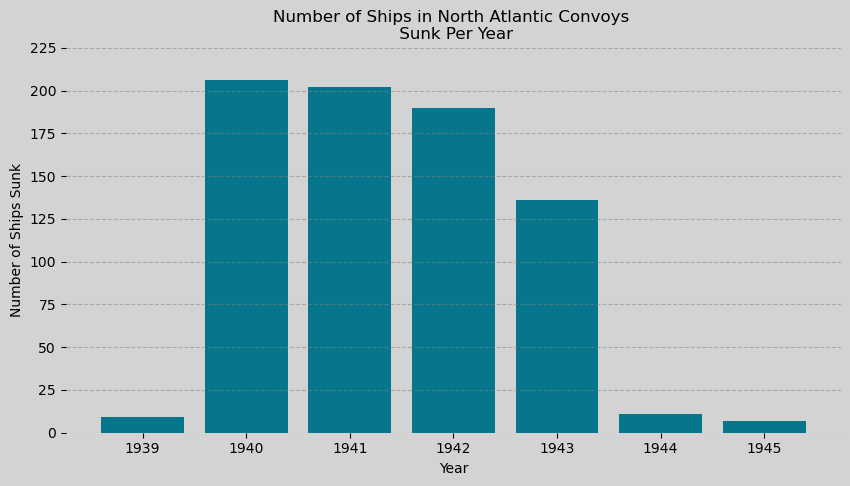

In [209]:
fig, ax = plt.subplots(figsize=(10, 5), facecolor='lightgrey')
ax.bar(df_ships_sunk_by_year['Year'], df_ships_sunk_by_year['Total Ships Sunk'], color='#06768d')
ax.set_title('Number of Ships in North Atlantic Convoys \n Sunk Per Year')
ax.set_ylabel('Number of Ships Sunk')
ax.set_xlabel('Year')
plt.yticks(np.arange(0, 250, 25))
ax.set_facecolor('lightgrey')
ax.grid(axis='y', linestyle='--', color='gray', alpha=0.5)
for spine in plt.gca().spines.values():
    spine.set_visible(False)

In [210]:
#Subset Data by Month
df['Year-Month'] = df['Year'].astype(str) + '-' + df['Month'].astype(str)
year_months = df['Year-Month'].unique()
ships_sunk_by_month = []
avg_num_uboats = []
avg_size_of_convoy_by_month = []
for year_month in year_months:
    if pd.isna(year_month):
        continue
    year_month_df = df[df['Year-Month'] == year_month]
    total_ships_sunk_2 = year_month_df['Number of Ships Sunk'].sum()
    total_u_boats = year_month_df['Avg Number of U-Boats in Atlantic'].mean()
    convoy_size = year_month_df['Number of Ships'].mean()
    ships_sunk_by_month.append((year_month, total_ships_sunk_2))
    avg_num_uboats.append((year_month, total_u_boats))
    avg_size_of_convoy_by_month.append((year_month, convoy_size))
df_ships_sunk_by_month = pd.DataFrame(ships_sunk_by_month, columns=('Year-Month', 'Total Ships Sunk'))
df_avg_num_uboats = pd.DataFrame(avg_num_uboats, columns=('Year-Month', 'Avg U-Boats at Sea'))
df_avg_size_of_convoy_by_month = pd.DataFrame(avg_size_of_convoy_by_month, columns=('Year-Month', 'Avg Size of Convoy (Ships)'))
month_letter_map = {1: 'J', 2: 'F', 3: 'M', 4: 'A', 5: 'M', 6: 'J', 7: 'J', 8: 'A', 9: 'S', 10: 'O', 11: 'N', 12: 'D'}
df_ships_sunk_by_month['Month First Letter'] = df_ships_sunk_by_month['Year-Month'].apply(
    lambda x: month_letter_map.get(int(float(x.split('-')[1])), ''))

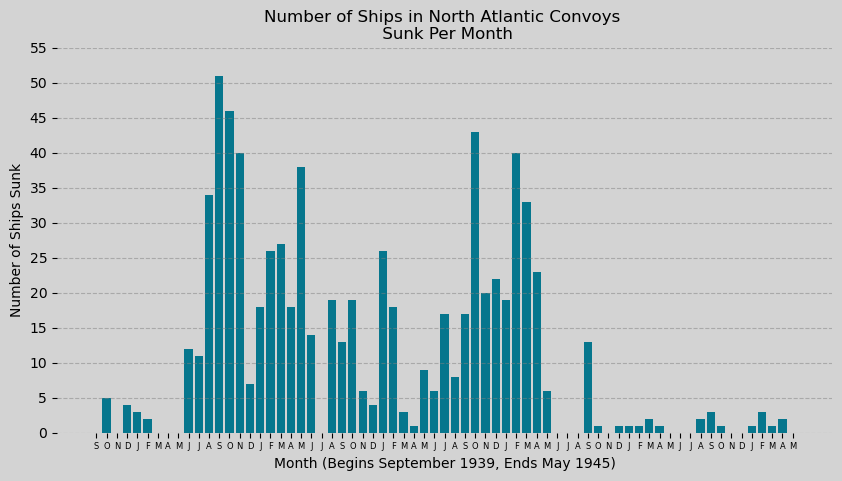

In [211]:
fig, ax = plt.subplots(figsize=(10, 5), facecolor='lightgrey')
ax.bar(df_ships_sunk_by_month['Year-Month'], df_ships_sunk_by_month['Total Ships Sunk'], color='#06768d')
ax.set_title('Number of Ships in North Atlantic Convoys \n Sunk Per Month')
ax.set_ylabel('Number of Ships Sunk')
ax.set_xlabel('Month (Begins September 1939, Ends May 1945)')
ax.xaxis.set_major_locator(ticker.FixedLocator(ax.get_xticks()))
ax.set_xticklabels(df_ships_sunk_by_month['Month First Letter'], fontsize=6)
ax.set_facecolor('lightgrey')
plt.yticks(np.arange(0, 60, 5))
ax.grid(axis='y', linestyle='--', color='gray', alpha=0.5)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.show()

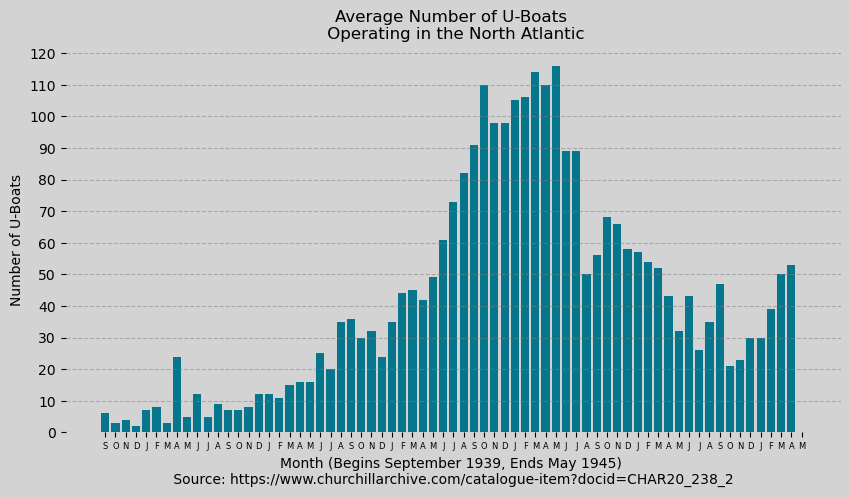

In [212]:
fig, ax = plt.subplots(figsize=(10, 5), facecolor='lightgrey')
ax.bar(df_avg_num_uboats['Year-Month'], df_avg_num_uboats['Avg U-Boats at Sea'], color='#06768d')
ax.set_title('Average Number of U-Boats \n Operating in the North Atlantic')
ax.set_ylabel('Number of U-Boats')
ax.set_xlabel('Month (Begins September 1939, Ends May 1945) \n Source: https://www.churchillarchive.com/catalogue-item?docid=CHAR20_238_2 ')
ax.xaxis.set_major_locator(ticker.FixedLocator(ax.get_xticks()))
ax.set_xticklabels(df_ships_sunk_by_month['Month First Letter'], fontsize=6)
ax.set_facecolor('lightgrey')
plt.yticks(np.arange(0, 130, 10))
ax.grid(axis='y', linestyle='--', color='gray', alpha=0.5)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.show()

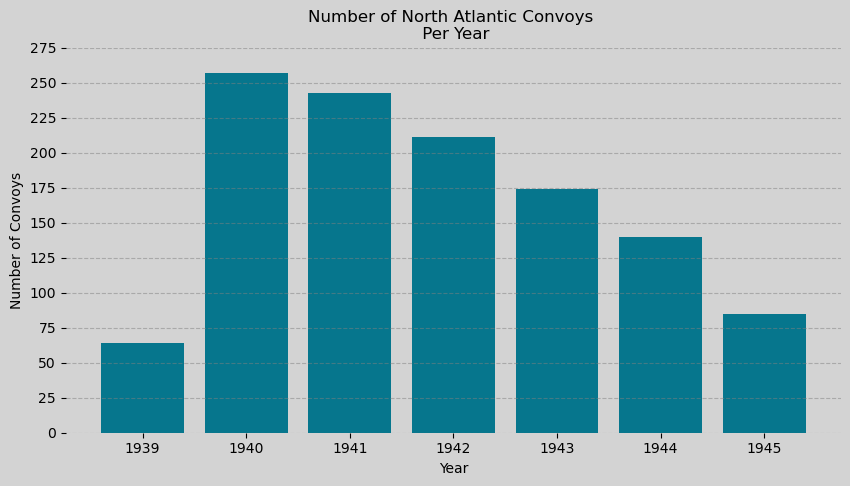

In [213]:
df['Year'] = df['Year'].astype(int)
convoy_count_per_year = df['Year'].value_counts().sort_index()
df_convoy_count_per_year = pd.Series(convoy_count_per_year)
fig, ax = plt.subplots(figsize=(10, 5), facecolor='lightgrey')
ax.bar(df_convoy_count_per_year.index, df_convoy_count_per_year.values, color='#06768d')
ax.set_title('Number of North Atlantic Convoys \n Per Year')
ax.set_ylabel('Number of Convoys')
ax.set_xlabel('Year',)
ax.set_facecolor('lightgrey')
plt.yticks(np.arange(0, 300, 25))
ax.grid(axis='y', linestyle='--', color='gray', alpha=0.5)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.show()

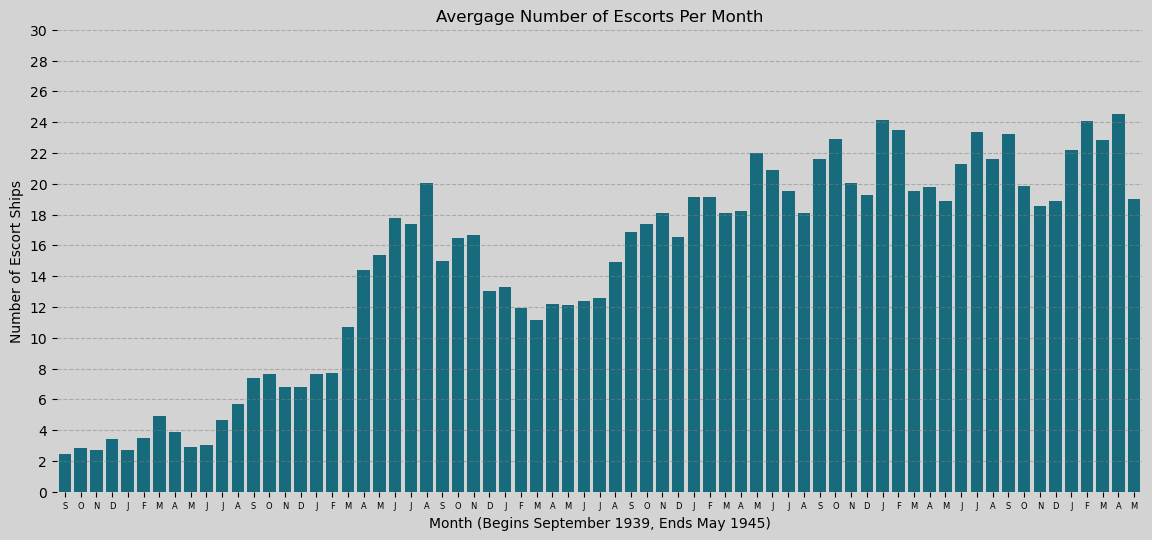

In [214]:
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))
monthly_avg_escorts = df.groupby('Date')['Number of Escort Ships'].mean().reset_index()
fig, ax = plt.subplots(figsize=(14, 6), facecolor='lightgrey')
sns.barplot(x='Date', y='Number of Escort Ships', data=monthly_avg_escorts, color='#06768d')
ax.xaxis.set_major_locator(ticker.FixedLocator(ax.get_xticks()))
ax.set_xticklabels(df_ships_sunk_by_month['Month First Letter'], fontsize=6)
ax.set_title('Avergage Number of Escorts Per Month')
ax.set_xlabel('Month (Begins September 1939, Ends May 1945)')
ax.set_facecolor('lightgrey')
plt.yticks(np.arange(0, 32, 2))
ax.grid(axis='y', linestyle='--', color='gray', alpha=0.5)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.show()

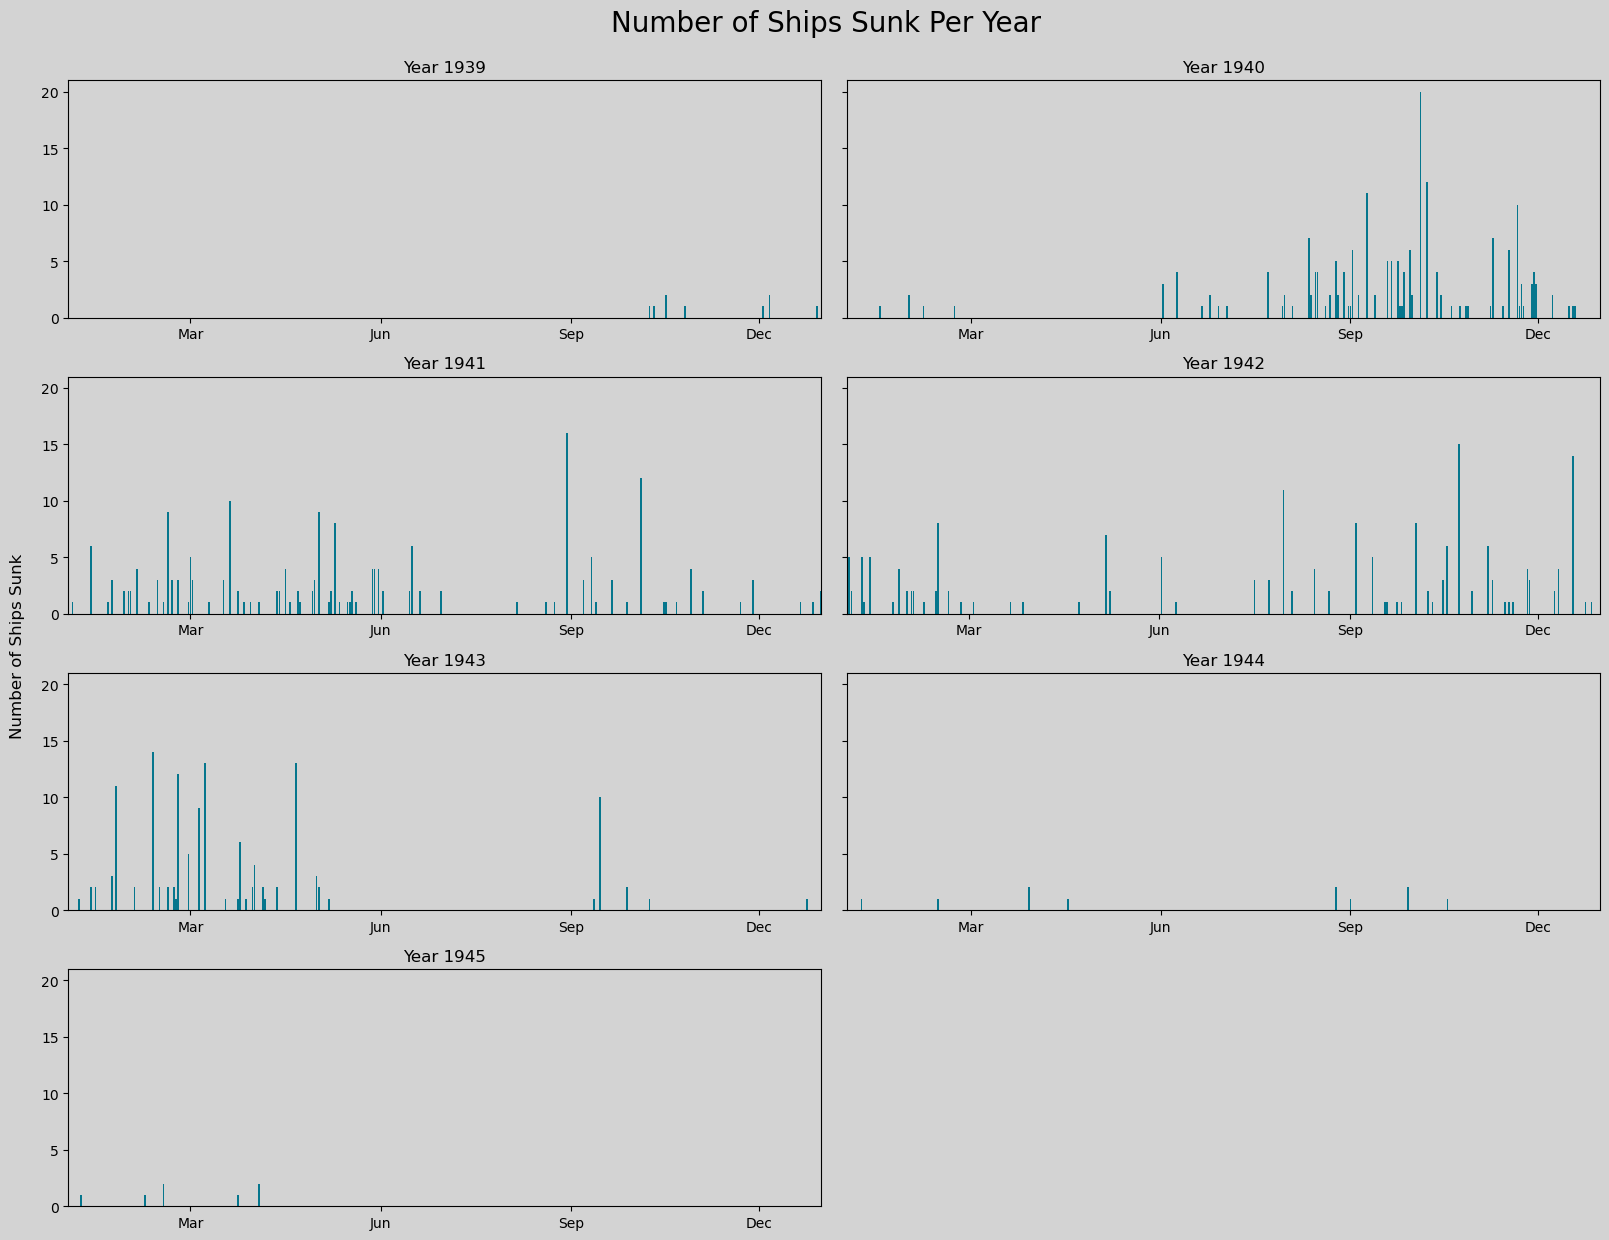

In [215]:
#Sinkings per Year
df_sunk = df[df['Number of Ships Sunk'] > 0].copy()
df_sunk['Depart_Date'] = pd.to_datetime(df_sunk['Depart_Date'])
years = range(1939, 1946)
df_sunk['Depart_Date'] = pd.to_datetime(df_sunk['Depart_Date'])  # Convert to datetime
df_sunk_years = {year: df_sunk[df_sunk['Year'] == year] for year in years}
fig, axs = plt.subplots(4, 2, sharey=True, figsize=(16, 12), facecolor='lightgrey')
for i, year in enumerate(years):
    row, col = divmod(i, 2)
    ax = axs[row, col]
    ax.bar(df_sunk_years[year]['Depart_Date'], df_sunk_years[year]['Number of Ships Sunk'], color='#06768d')
    ax.set_title(f"Year {year}")
    ax.set_facecolor('lightgrey')
    start_date = pd.Timestamp(year=year, month=1, day=1)
    end_date = pd.Timestamp(year=year, month=12, day=31)
    ax.set_xlim(start_date, end_date)
    month_ticks = [pd.Timestamp(year=year, month=m, day=1) for m in [3, 6, 9, 12]]
    ax.set_xticks(month_ticks)
    ax.set_xticklabels([date.strftime('%b') for date in month_ticks])
plt.tight_layout()
plt.suptitle('Number of Ships Sunk Per Year', x=0.5, y=1.03, fontsize=20)
fig.supylabel('Number of Ships Sunk', x=-0.01, y=.5, fontsize=12)
fig.delaxes(axs[3][1])
plt.show()

In [144]:
#Yearly Total Ship Type Counts
yearly_avg_escorts = df.groupby(df['Year'])['Number of Escort Ships'].sum().reset_index().round()
yearly_avg_ships = df.groupby(df['Year'])['Number of Ships'].sum().reset_index().round()
yearly_avg_ships['Number of Ships'] = (yearly_avg_ships['Number of Ships'] - yearly_avg_escorts['Number of Escort Ships'])

Text(0.5, 0.98, 'Comparison of Total Number of Merchent Ships per Year \n and Total Number of Escort Ships per Year')

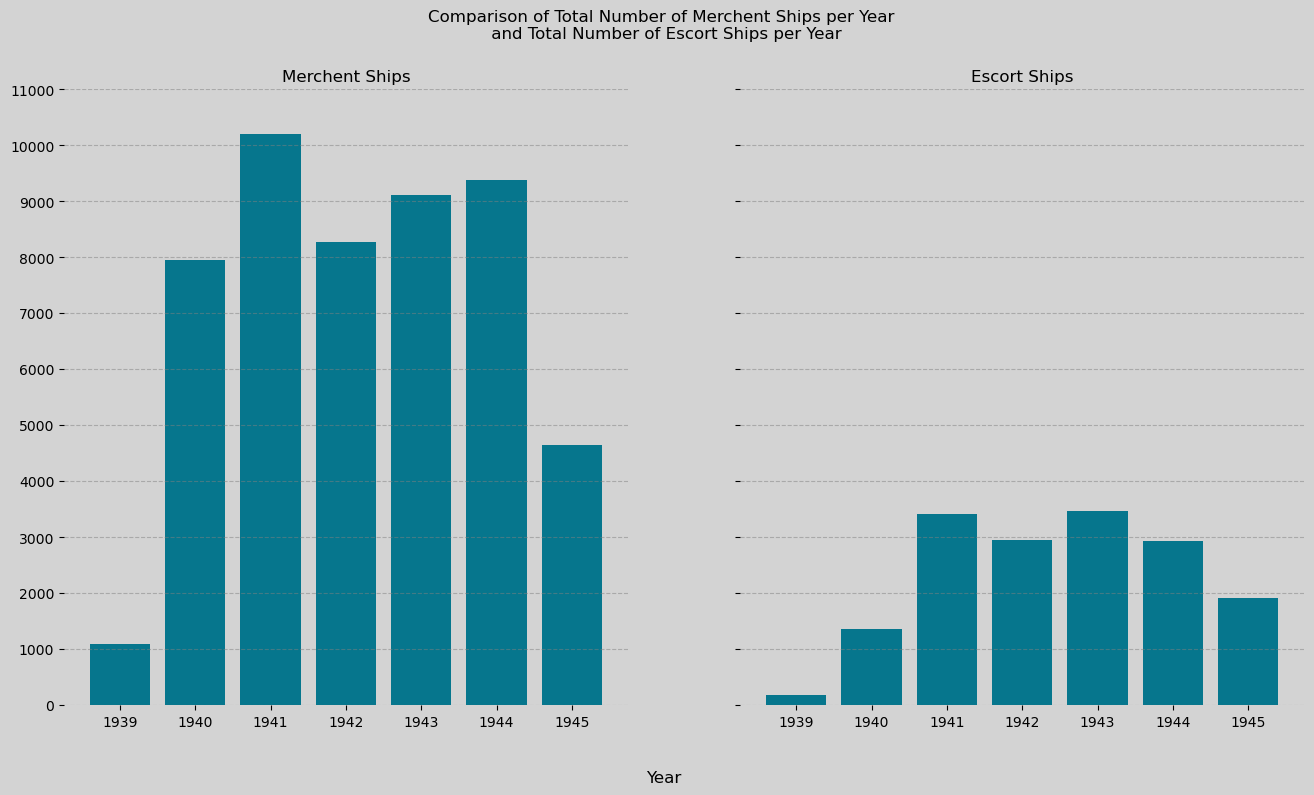

In [216]:
#Comparison of Total Merchent And Escort Ships
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(16, 8), facecolor='lightgrey')
axs[0].bar(yearly_avg_ships['Year'], yearly_avg_ships['Number of Ships'], color='#06768d')
axs[0].set_facecolor('lightgrey')
axs[0].set_title('Merchent Ships')
axs[0].grid(axis='y', linestyle='--', color='gray', alpha=0.5)
for spine in axs[0].spines.values():
    spine.set_visible(False)
axs[1].bar(yearly_avg_escorts['Year'], yearly_avg_escorts['Number of Escort Ships'], color='#06768d')
axs[1].set_facecolor('lightgrey')
axs[1].set_title('Escort Ships')
axs[1].grid(axis='y', linestyle='--', color='gray', alpha=0.5)
for spine in axs[1].spines.values():
    spine.set_visible(False)
plt.yticks(np.arange(0, 12000, 1000))
fig.supxlabel('Year')
fig.suptitle('Comparison of Total Number of Merchent Ships per Year \n and Total Number of Escort Ships per Year')